In [4]:
import cv2
import matplotlib.pyplot as plt

In [6]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

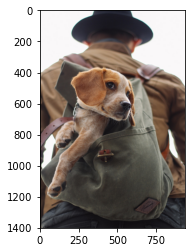

In [7]:
plt.imshow(img1)

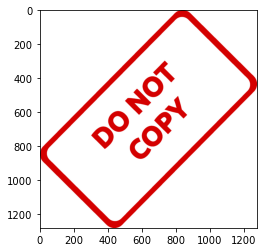

In [8]:
plt.imshow(img2)

In [9]:
img1.shape

(1401, 934, 3)

In [10]:
img2.shape

(1280, 1277, 3)

In [12]:
#Blending images of same size
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

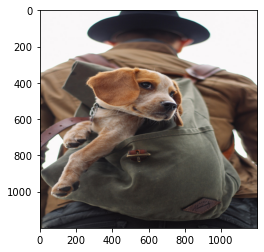

In [13]:
plt.imshow(img1)

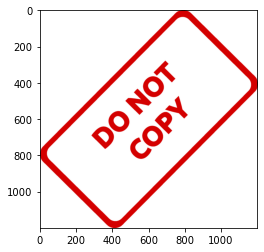

In [15]:
plt.imshow(img2)


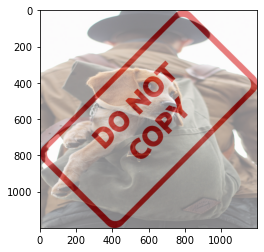

In [18]:
#add weighted work in images of ssame size
blended = cv2.addWeighted(src1=img1,alpha =0.5, src2=img2,beta=0.5,gamma=0)
plt.imshow(blended)

In [28]:
#Blend images with different size
#overlay small image on top of large image (NO BLENDING)
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

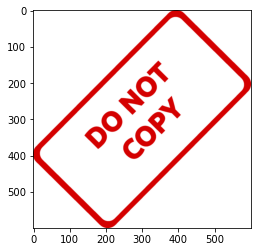

In [29]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

In [31]:
#fit small in large
small_image = img2
large_image = img1
x_offset = 0
y_offset = 0

In [33]:
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]
small_image.shape

(600, 600, 3)

In [34]:
large_image[y_offset:y_end, x_offset:x_end] = small_image

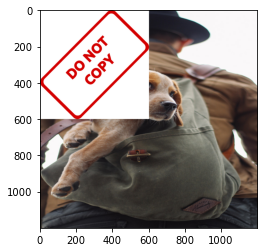

In [35]:
plt.imshow(large_image)

In [36]:
#Blend with different size
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

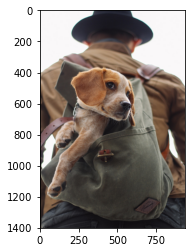

In [37]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img1)

In [38]:
img1.shape

(1401, 934, 3)

In [39]:
x_offset = 934-600
y_offset = 1401-600
rows,cols,channels = img2.shape

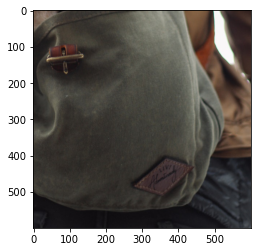

In [40]:
roi = img1[y_offset:1401,x_offset:943]
plt.imshow(roi)

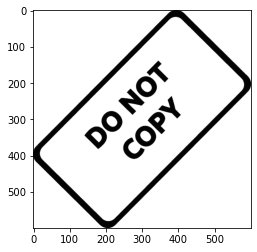

In [41]:
#mask of donotcopy image
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap="gray")

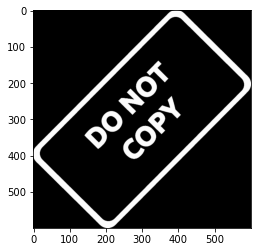

In [44]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap="gray")

In [45]:
mask_inv.shape

(600, 600)

In [47]:
import numpy as np

In [48]:
white_background = np.full(img2.shape,255,dtype=np.uint8)
white_background.shape

(600, 600, 3)

In [49]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)
bk.shape

(600, 600, 3)

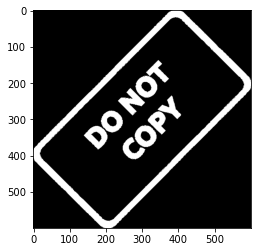

In [50]:
plt.imshow(bk)

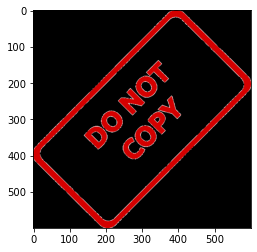

In [51]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

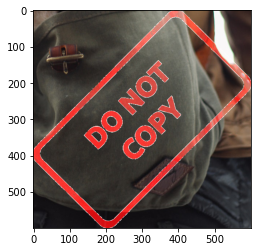

In [52]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [53]:
large_image = img1
small_image = final_roi

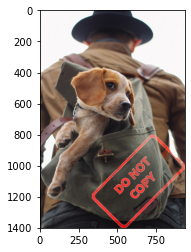

In [54]:
large_image[y_offset:y_offset+small_image.shape[0], x_offset:x_offset+small_image.shape[1]] = small_image
plt.imshow(large_image)